In [1]:
import os
import sys
import spectral

notebook_path=os.getcwd()
project_root=os.path.dirname(notebook_path)
if project_root not in sys.path:
    sys.path.append(project_root)
    print(f"O caminho '{project_root}' foi adicionado ao sys.path.")
try:
    from src.rois import rois
    print("\nOK Código")
except ImportError as e:
    print(f"\nErro: {e}")
print("OK Bibliotecas")

O caminho '/Users/arthurogomes/Documents/IC PUCGO/Code' foi adicionado ao sys.path.

OK Código
OK Bibliotecas


In [2]:
arquivo_hdr='../data/bronze level/hsi_original/351_1_240506-160920/capture/351_1_240506-160920.hdr'
hdr_path_completo=os.path.join(arquivo_hdr)
try:
    img=spectral.open_image(hdr_path_completo).load()
    print(f"Imagem carregada de: {hdr_path_completo}")
except FileNotFoundError:
    print(f"Arquivo não encontrado")

Imagem carregada de: ../data/bronze level/hsi_original/351_1_240506-160920/capture/351_1_240506-160920.hdr


/Users/arthurogomes/Documents/IC PUCGO/Code/.venv/lib/python3.13/site-packages/spectral/io/envi.py:187: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


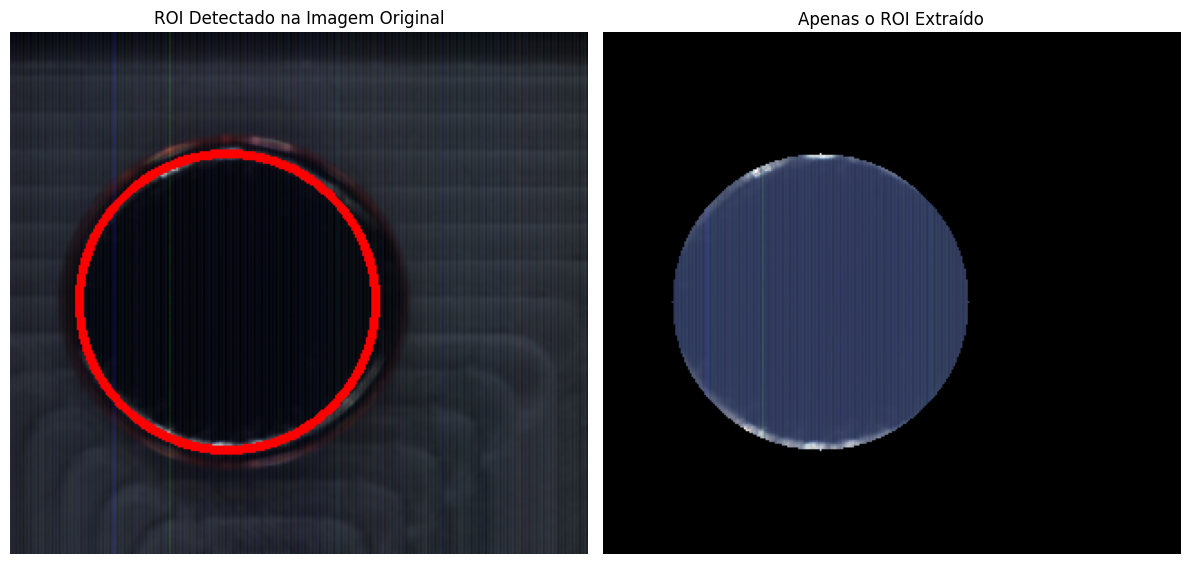

In [3]:
rois(img)